# Rejection Sampling

First import dependencies

In [28]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

## Create Samples
In the functions below we create random samples of size n, for the given distributions:
$U \sim U(0, 1)$,
$X \sim N(0, 1)$,
$Y \sim \exp(1)$, and
$Z \sim \|X\|$

In [15]:
def simulate_u(size: int) -> np.ndarray:
    return np.random.random(size)
    
def simulate_x(size: int) -> np.ndarray:
    return np.random.normal(0, 1, size)

def simulate_y(size: int) -> np.ndarray:
    # Moet met dat ding inverse ~ Robin
    return np.random.exponential(1, size)

def simulate_z(size: int) -> np.ndarray:
    return np.abs(simulate_x(size))


## Generate Z using rejection sampling
Hahah geen idee of dit het is

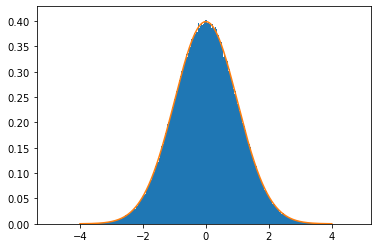

In [29]:
def rejection_abs_normal(n):
    X = np.zeros(n)

    for i in range(0,n):
        Y = simulate_y(1)
        U = np.random.rand()
        while U > np.exp(-0.5 * Y **2 + Y - 0.5):
            Y = simulate_y(1)
            U = np.random.rand()
            
        X[i] = Y

    return X

def split(input):
    for i in range(len(input)): 
        if simulate_u(1) > 0.5: input[i] = -input[i]

    return input

def standard_normal(n):
    x = np.linspace(-4, 4, n)
    y = sts.norm.pdf(x)

    return y
    

def main():
    n = 1000000
    samples = rejection_abs_normal(n)
    samples = split(samples)


    plt.hist(samples, density=True, bins=500)
    plt.plot(np.linspace(-4, 4, 1000), standard_normal(1000))
    plt.show()



main()